In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['figure.dpi']= 200

In [2]:
observations = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

# Introduction

**Goals**
1. What is the distribution of conservation_status for animals?
2. Are certain species / categories more likely to be endangered than others?
3. Are the differences between species and their conservation status significant?

**Data**

Both datasets were obtained from [Codecademy](https://www.codecademy.com).

In [3]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [4]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [90]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


Just from inspecting the code so far we can see that most conservation_status values are null.We also see that both datasets have the same list of values in the scientific_name column, so it would make sense to join the two at that column. 

In [6]:
#print(sorted(observations.scientific_name.unique()) == sorted(species.scientific_name.unique()))  # True

data = observations.merge(species)
data.head()
 

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,NaN


So the goal of this dataset is to uncover any patterns or themes that exist among species that become endangered. We can begin by looking at how different categories and classified in terms of conservation status, and then determining if particular types of species are more likely to be endangered.

In [7]:
endangered = data[data.conservation_status.notna()].copy()
endangered.head()


,scientific_name,park_name,observations,category,common_names,conservation_status
120,Zizia trifoliata,Yosemite National Park,135,Vascular Plant,"Meadow Alexanders, Three-Leaved Golden Alexanders",Species of Concern
121,Zizia trifoliata,Yellowstone National Park,238,Vascular Plant,"Meadow Alexanders, Three-Leaved Golden Alexanders",Species of Concern
122,Zizia trifoliata,Bryce National Park,87,Vascular Plant,"Meadow Alexanders, Three-Leaved Golden Alexanders",Species of Concern
123,Zizia trifoliata,Great Smoky Mountains National Park,80,Vascular Plant,"Meadow Alexanders, Three-Leaved Golden Alexanders",Species of Concern
204,Camissonia sierrae ssp. alticola,Bryce National Park,84,Vascular Plant,"Mono Hot Springs Evening Primrose, Mono Hot Sp...",Species of Concern


## Conservation status distribution amongst categories.

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
Name: common_names, dtype: int64


[Text(0, 0, 'Species of Concern'),
 Text(1, 0, 'Endangered'),
 Text(2, 0, 'Threatened'),
 Text(3, 0, 'In Recovery')]

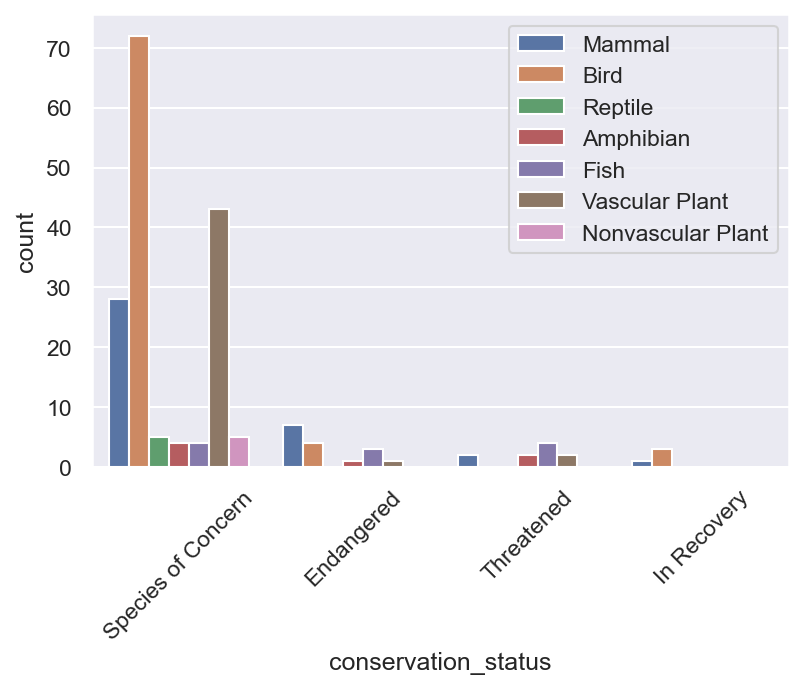

In [8]:
status = species.conservation_status.unique()[1:]

print(species.groupby('conservation_status').common_names.count())

fig,ax = plt.subplots()
ax = sns.countplot(data=species, x='conservation_status', hue='category')
ax.legend(loc='upper right')
ax.set_xticklabels(rotation=45, labels=status)

Evidently we can see that among the species of concern, birds, followed by vascular plants and mammals, are by far the most populated categories. We can also see that conservation status category is evenly distributed among each of the four parks. Interesting. (it is artificial data)

In [9]:
parks = data[data.conservation_status.notna()]\
    .groupby(["conservation_status", "park_name"])['scientific_name']\
    .count()\
    .unstack()

parks

park_name,Bryce National Park,Great Smoky Mountains National Park,Yellowstone National Park,Yosemite National Park
conservation_status,,,,
Endangered,20,20,20,20
In Recovery,6,6,6,6
Species of Concern,183,183,183,183
Threatened,11,11,11,11


## Are certain species more likely to become a species of concern or endangered?

We can first look at the species of concern status, and determine whether the difference between species is significant. We can look for common words among the common names from the species dataset.

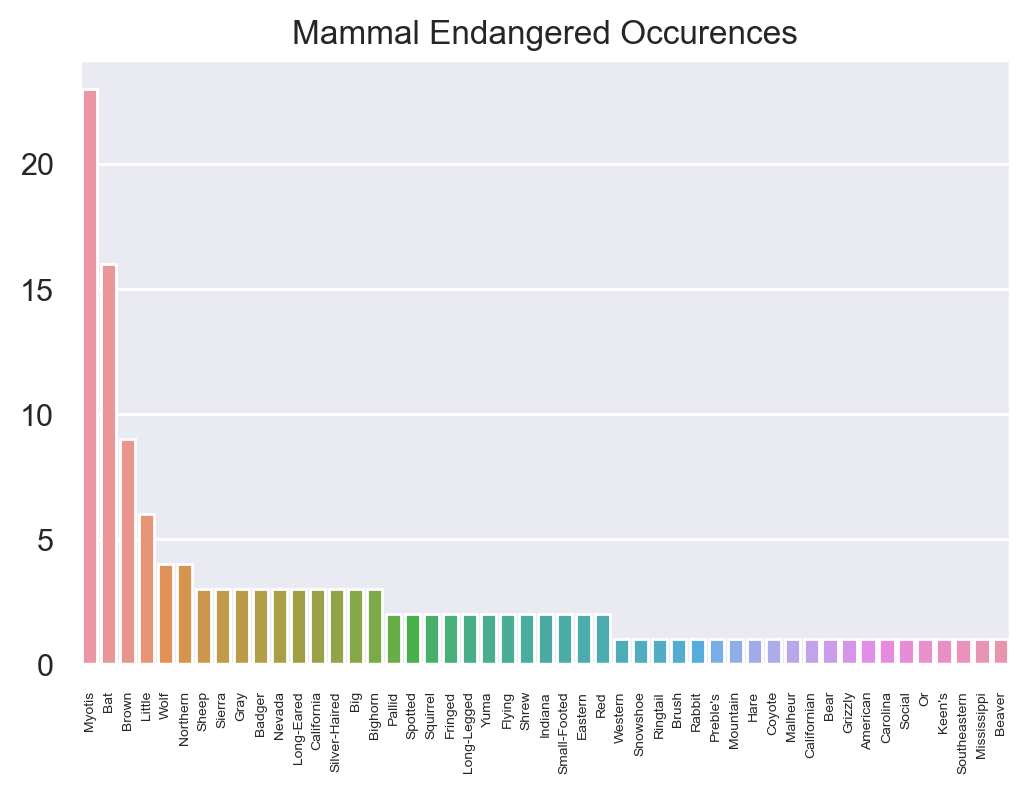

In [67]:
# Need to eliminate all rows with nan in conservation_status column. In the sample solution, this was not done, hence the results simply provided the most observed species, not the most endangered.
species_endangered = species[(species.conservation_status.notna()) & (species.conservation_status!='In Recovery')].copy()

common_names_mammal = [name.split() for name in species_endangered[species_endangered.category=='Mammal'].common_names.unique()]
mammal_words = [word for words in common_names_mammal for word in words]  # List of words to check against
mammal_words = [i.replace(',', '') for i in mammal_words] 
mammal_words = pd.Series(mammal_words)

fig, ax = plt.subplots()
ax = sns.barplot(x=mammal_words.value_counts().index, y=mammal_words.value_counts().values)
ax.set_xticklabels(labels=mammal_words.value_counts().index, rotation=90, fontsize=5);
plt.title('Mammal Endangered Occurences');

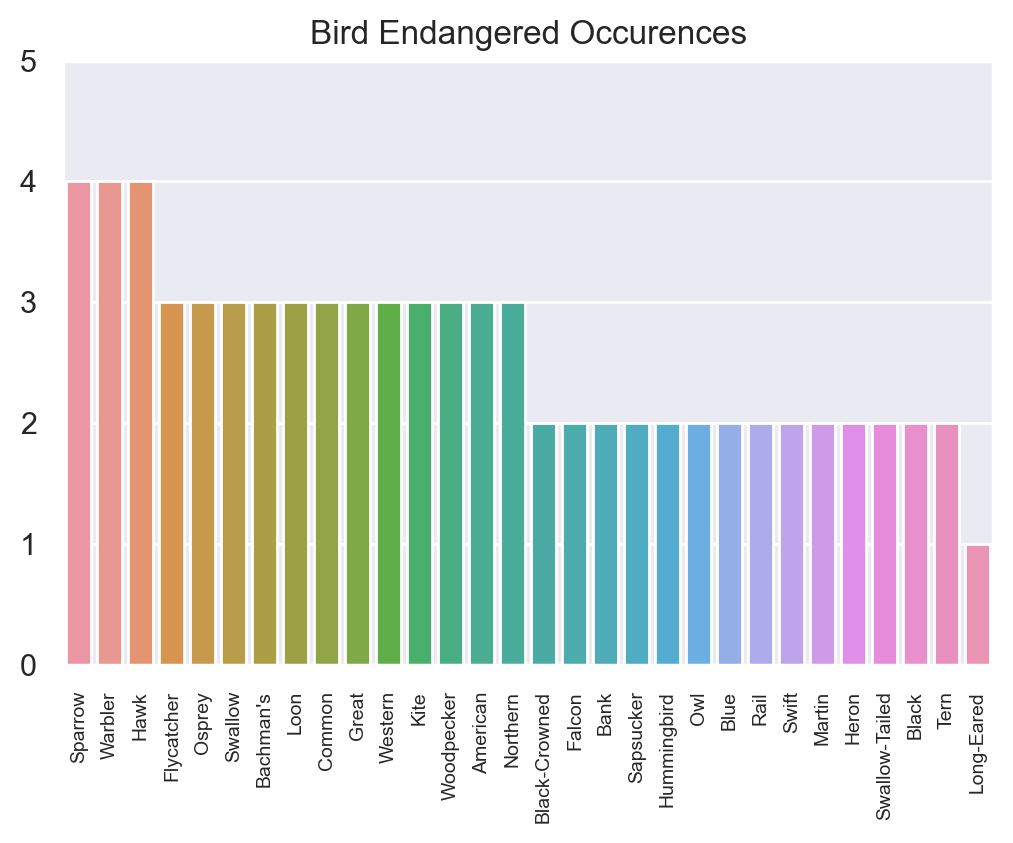

In [78]:
common_names_bird = [name.split() for name in species_endangered[species_endangered.category=='Bird'].common_names.unique()]
bird_words = [word for words in common_names_bird for word in words]  # List of words to check against
bird_words = [i.replace(',', '') for i in bird_words] 
bird_words = pd.Series(bird_words)
#print(bird_words.value_counts())

fig, ax = plt.subplots()
ax = sns.barplot(x=bird_words.value_counts().index[:30], y=bird_words.value_counts().values[:30])
ax.set_xticklabels(labels=bird_words.value_counts().index[:30], rotation=90, fontsize=7);
plt.title('Bird Endangered Occurences');
ax.set_ylim(ymax=5);


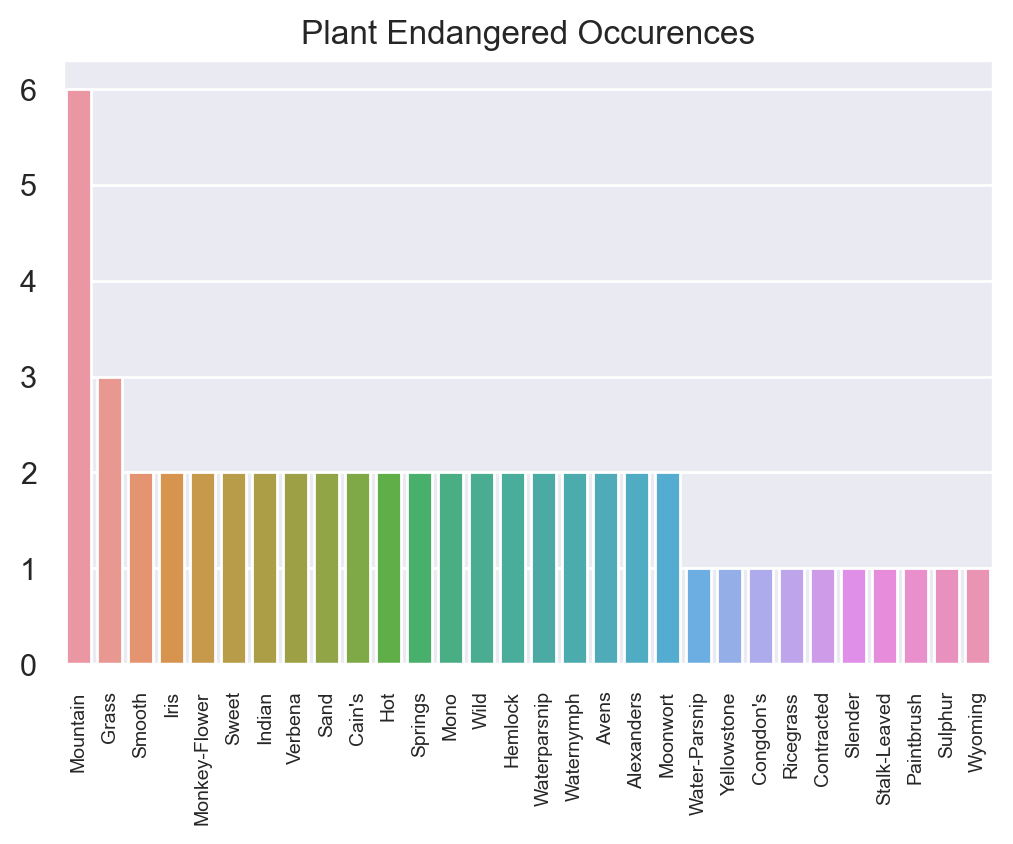

In [81]:
common_names_plant = [name.split() for name in species_endangered[species_endangered.category=='Vascular Plant'].common_names.unique()]
plant_words = [word for words in common_names_plant for word in words]  # List of words to check against
plant_words = [i.replace(',', '') for i in plant_words] 
plant_words = pd.Series(plant_words)
#print(plant_words.value_counts())

fig, ax = plt.subplots()
ax = sns.barplot(x=plant_words.value_counts().index[:30], y=plant_words.value_counts().values[:30])
ax.set_xticklabels(labels=plant_words.value_counts().index[:30], rotation=90, fontsize=7);
plt.title('Plant Endangered Occurences');


From the data above, we can conclude the following:

- For mammals:
    - The bat is by far the most common species with a classification, followed by wolves, sheep and badgers. (a myotis is a bat)
    - The least endangered are beavers, bears, and coyotes.
- For birds:
    - The three most endangered species, being sparrows, warblers, and hawks, are only slightly more endangered than others. 
- For plants:
    - Plants with the word 'mountain' in its common name were by far the most endangered.

We have also seen that most species are not under a threatened classification(5633 not classified, 191 classified), and that birds, vascular plants, and mammals are by far the most frequent threatened observations.

(This is artificial data, so it is difficut to determine any legitimate patterns or connections among mammals, plants and birds.)
